### Using any regression algorithm, predict usage_kwh
#### Show the scores for test_data and train_data

In [1]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv("Steel_industry_data.csv")
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [3]:
# Changing index to date
df = df.set_index('date')

# Removing duplicates
df = pd.get_dummies(df, drop_first = True)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0,0,0,0,0,0,0
31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0,0,0,0,0,0,0
31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0,0,0,0,0,0,0


In [4]:
# Creating test and train data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28032, 15)
(28032,)
(7008, 15)
(7008,)


In [5]:
# 1. Linear Regression
lr = LinearRegression()
%time lr.fit(X_train, y_train)
print("train_data score:", lr.score(X_train, y_train))
print("test_data score:", lr.score(X_test, y_test))

Wall time: 1.53 s
train_data score: 0.9804300889435204
test_data score: 0.9804741253813614


### Cross Validation

In [6]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

In [7]:
cv_res = cross_validate(lr, X, y, cv = 3, n_jobs = 5)
cv_res

{'fit_time': array([0.06249475, 0.0624845 , 0.06249475]),
 'score_time': array([0.05337906, 0.03775644, 0.05337906]),
 'test_score': array([0.96918902, 0.98507153, 0.98611073])}

In [8]:
kf=KFold(n_splits=5)
score=cross_val_score(lr,X,y,cv=kf)
print("Cross Validation score (Linear Regression):".format(score))
print("Average:".format(score.mean()))

Cross Validation score (Linear Regression):
Average:


In [9]:
param_grid = {
    'copy_X': [i for i in range(1,5)],
    'fit_intercept': [5, 6, 7],
    'n_jobs': [3, 4, 5], 
    'normalize': ["deprecated"],
    'positive': [8]
}

grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=5) 

   
grid.fit(X_train, y_train) 
  
print(grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'copy_X': 1, 'fit_intercept': 5, 'n_jobs': 3, 'normalize': 'deprecated', 'positive': 8}


In [10]:
# 2. Ridge Regression
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
print("train_data score:", ridge.score(X_train, y_train))
print("test_data score:",ridge.score(X_test, y_test))

Wall time: 135 ms
train_data score: 0.9695610663209363
test_data score: 0.9702121467908825


In [11]:
# 3. Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
print("train_data score:", lasso.score(X_train, y_train))
print("test_data score:",lasso.score(X_test, y_test))

Wall time: 53.9 ms
train_data score: 0.9122411612131699
test_data score: 0.9133115515858341


In [12]:
# On comparison, we can conclude that the linear regression model is more accurate in predicting Usage_kWh

In [13]:
# Predicting Usage_kWh
y_pred = lr.predict(X_test)
print(y_pred)

[ 2.54164385  5.79250037 46.57945436 ...  1.79759004 65.88163019
 61.09588965]


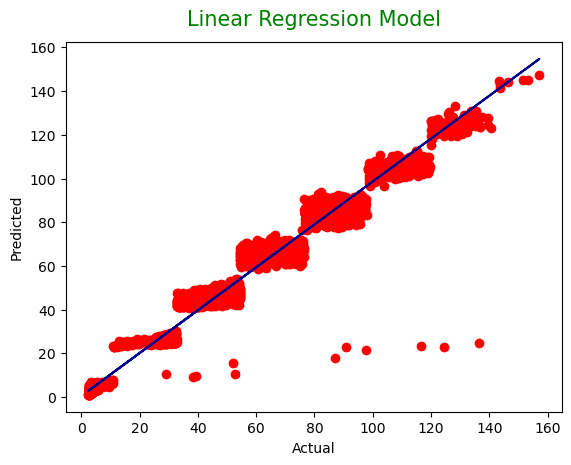

In [14]:
# Plotting model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()